<h1>Artificial Intelligence Continous Assessment</h1>

<h2>Goals</h2>
<p>
    To build a model to predict base salaries from crowd-sourced salary data<br>
    
</p>

<h2>Imports</h2>

In [411]:
import pandas as pd
import numpy as np

from seaborn import lmplot, stripplot

from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

from seaborn import scatterplot, heatmap

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score


<h2>Dataset Analysis (First look)</h2>

In [412]:
# Reading the salaries dataset from csv
df = pd.read_csv("data_salaries.csv")

# Shuffle dataset
df = df.sample(frac=1, random_state=2)
df.reset_index(drop=True, inplace=True)

In [413]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62527 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  int64  
 7   yearsatcompany           62642 non-null  int64  
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  int64  
 10  stockgrantvalue          62642 non-null  int64  
 11  bonus                    62642 non-null  int64  
 12  gender                   43102 non-null  object 
 13  otherdetails             40139 non-null  object 
 14  cityid                

In [414]:
# List of features
features = ["timestamp","company","level","title","totalyearlycompensation","location","yearsofexperience","yearsatcompany","tag","basesalary",	"stockgrantvalue","bonus","gender","otherdetails","cityid","dmaid","rowNumber"]

In [415]:
# Summary of stats
df.describe(include="all")

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
count,62642,62637,62527,62642,6.264200e+04,62642,62642.000000,62642.000000,61788,6.264200e+04,6.264200e+04,62642.000000,43102,40139,62642.000000,62640.000000,62642.000000
unique,62561,1869,3071,15,NaN,1050,NaN,NaN,3271,NaN,NaN,NaN,4,40132,NaN,NaN,NaN
top,1/10/2019 21:44:02,Amazon,L4,Software Engineer,NaN,"Seattle, WA",NaN,NaN,Full Stack,NaN,NaN,NaN,Male,twauesly,NaN,NaN,NaN
freq,3,8054,5008,41231,NaN,8701,NaN,NaN,11382,NaN,NaN,NaN,35702,2,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.175327e+03,NaN,7.191054,2.700616,NaN,1.798145e+03,1.134865e+03,242.317199,NaN,NaN,9856.201989,616.097222,41694.723732
std,NaN,NaN,NaN,NaN,3.877877e+04,NaN,6.437148,3.524030,NaN,1.927194e+04,2.520611e+04,3709.187697,NaN,NaN,6679.104563,289.843390,24488.865879
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,1.160000e+02,NaN,3.000000,0.000000,NaN,8.800000e+01,0.000000e+00,1.000000,NaN,NaN,7369.000000,506.000000,20069.250000
50%,NaN,NaN,NaN,NaN,1.830000e+02,NaN,6.000000,1.000000,NaN,1.310000e+02,2.300000e+01,13.000000,NaN,NaN,7839.000000,807.000000,42019.000000
75%,NaN,NaN,NaN,NaN,2.690000e+02,NaN,10.000000,4.000000,NaN,1.810000e+02,6.400000e+01,27.000000,NaN,NaN,11521.000000,807.000000,63021.750000


In [416]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,11/3/2020 10:26:30,Microsoft,60,Data Scientist,181,"Redmond, WA",1,1,ML / AI,104,47,30,Male,mckeiaps hash ghaart gronds wuit zearts tsiott...,11521,819.0,47529
1,8/14/2018 21:08:29,VMware,Senior MTS,Software Engineer,0,"Palo Alto, CA",5,3,Full Stack,0,0,0,NaN,NaN,7351,807.0,1418
2,5/18/2019 0:32:17,Paypal,T25,Software Engineer,213,"San Francisco, CA",7,1,API Development (Back-End),180,19,14,Male,NaN,7419,807.0,8815
3,8/3/2021 20:25:07,Trend Micro,Senior Engineer,Software Engineer,18,"Taipei, TP, Taiwan",2,2,Distributed Systems (Back-End),14,1,3,Male,mcclieusp hyoully preebly gloiands screoch sch...,6744,0.0,81297
4,5/3/2021 15:25:42,Visa,Senior Software Engineer,Software Engineer,179,"Austin, TX",3,0,Full Stack,158,9,12,Female,dyniawn cauny spliur cleals crungs kwoiw thrai...,10965,635.0,68303


In [417]:
df["gender"].value_counts() 

Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64

In [418]:
df[df["basesalary"] == 0].shape

(2304, 17)

In [419]:
df["otherdetails"].unique()

array(['mckeiaps hash ghaart gronds wuit zearts tsiotts twearts schriam',
       nan,
       'mcclieusp hyoully preebly gloiands screoch schaionds hydriaof raiarth grems juency schrioss spluig schiiv draiark',
       ..., 'mcdoady',
       'viaorry pfaiasm mcclims roind tueght smeingly schmidy kniuys tribly symbiiry niunn typaueds hoov',
       'mccriist sreeng mcniov wify cloias dousch twaabs schioutch rauehl mckiaors szaiads saiosly sauh gniaol threiasts'],
      dtype=object)

In [420]:
df["location"].value_counts()

Seattle, WA                      8701
San Francisco, CA                6797
New York, NY                     4562
Redmond, WA                      2649
Mountain View, CA                2275
                                 ... 
Redmond, UT                         1
Reedsville, PA                      1
Guildford, EN, United Kingdom       1
Annapolis, MD                       1
Pasir Ris, SG, Singapore            1
Name: location, Length: 1050, dtype: int64

<h3>Initial Observations</h3>
<p>
    There are 62642 entries in the dataset. <br>
    <b>Timestamp: </b>Timestamps has 62561 unique values that are nominal.<br>
    <b>Level: </b>Out of 3071 levels of education, L4 is the overwhelming majority.<br>
    <b>Title: </b>There are only 15 different occupations. Majority of entries are Software Engineers making up 66% of the total.<br>
    <b>Company: </b>There are 1869 companies. Amazon hires the most amount of employees, 8054. All the companies seem to be legitimate<br>
    <b>Location: </b>There are 8701 workers that live in Seattle. Amazon is possibly the main contributor to this given their headquarters is located there.<br>
    <b>Tag: </b>Out of 3271 tags, Full Stack is the overwhelming majority.<br>
    <b>Gender: </b>4 unique values for gender. Besides, male, female, other and NaN, there's a "Title: Senior Software Engineer" stuck in there.<br>
    <b>Other Details: </b>All the details blocks either contain jibberish or are completely empty<br>
    <br>
    <b>Base Salary: </b>There are 2304 entries with the minimum value 0. Possibly an error<br>
</p>



<h2>Data Cleaning</h2>

In [421]:
# Drop only basesalaries of 0
df.drop(df[df['basesalary'] < 30].index, inplace = True)
df.shape

(58811, 17)

<p>
I plan on multiplying all the values under 500 by 1000. I think it's implausible that anyone can be paid under 30,000 dollars.<br>
I believe the trade off of removing 3831 entries to save time cleaning is worth it. Hopefully the bulk of the entries removed are messy.
</p>

In [422]:
# Removing the odd gender value
df.drop(df[df["gender"] == "Title: Senior Software Engineer"].index, inplace=True)
df["gender"].value_counts()

Male      33783
Female     6718
Other       371
Name: gender, dtype: int64

<p>
"Title: Senior Software Engineer" is most likely an error than a gender. If it was a gender, it would categorized under "other"
</p>

In [423]:
del df["timestamp"]
del df["bonus"]
del df["stockgrantvalue"]
del df["gender"]
del df["otherdetails"]
del df["rowNumber"]
del df["cityid"]
del df["dmaid"]
del df["totalyearlycompensation"]
del df["yearsatcompany"]

<p>
    <b>Timestamp & Row Number: </b>Given that the goal is to predict the base salaries, this column is unrelated. These values are also unique which will make for a very high corelation.<br>
    <b>Other Details, City ID & DMA ID: </b>Not related to the target value<br>
    <b>Stock Grant Value, Years at company & Bonuses: </b>Both of these columns aren't needed for predicting how much someone should be paid when they start a job. They're more for how much they should be paid in the future.<br>
    <b>Gender: </b>By law men and women get paid equally, so it makes no difference<br>
</p>

<h2>Splitting the Dataset into Test and Training</h2>
<h4>Holdout</h4>

In [424]:
# 20% of the dataset is used for testing
dev_df, test_df = train_test_split(df, train_size=0.8, random_state=2)

<h2>Data Exploration</h2>

In [425]:
copy_df = df.copy()

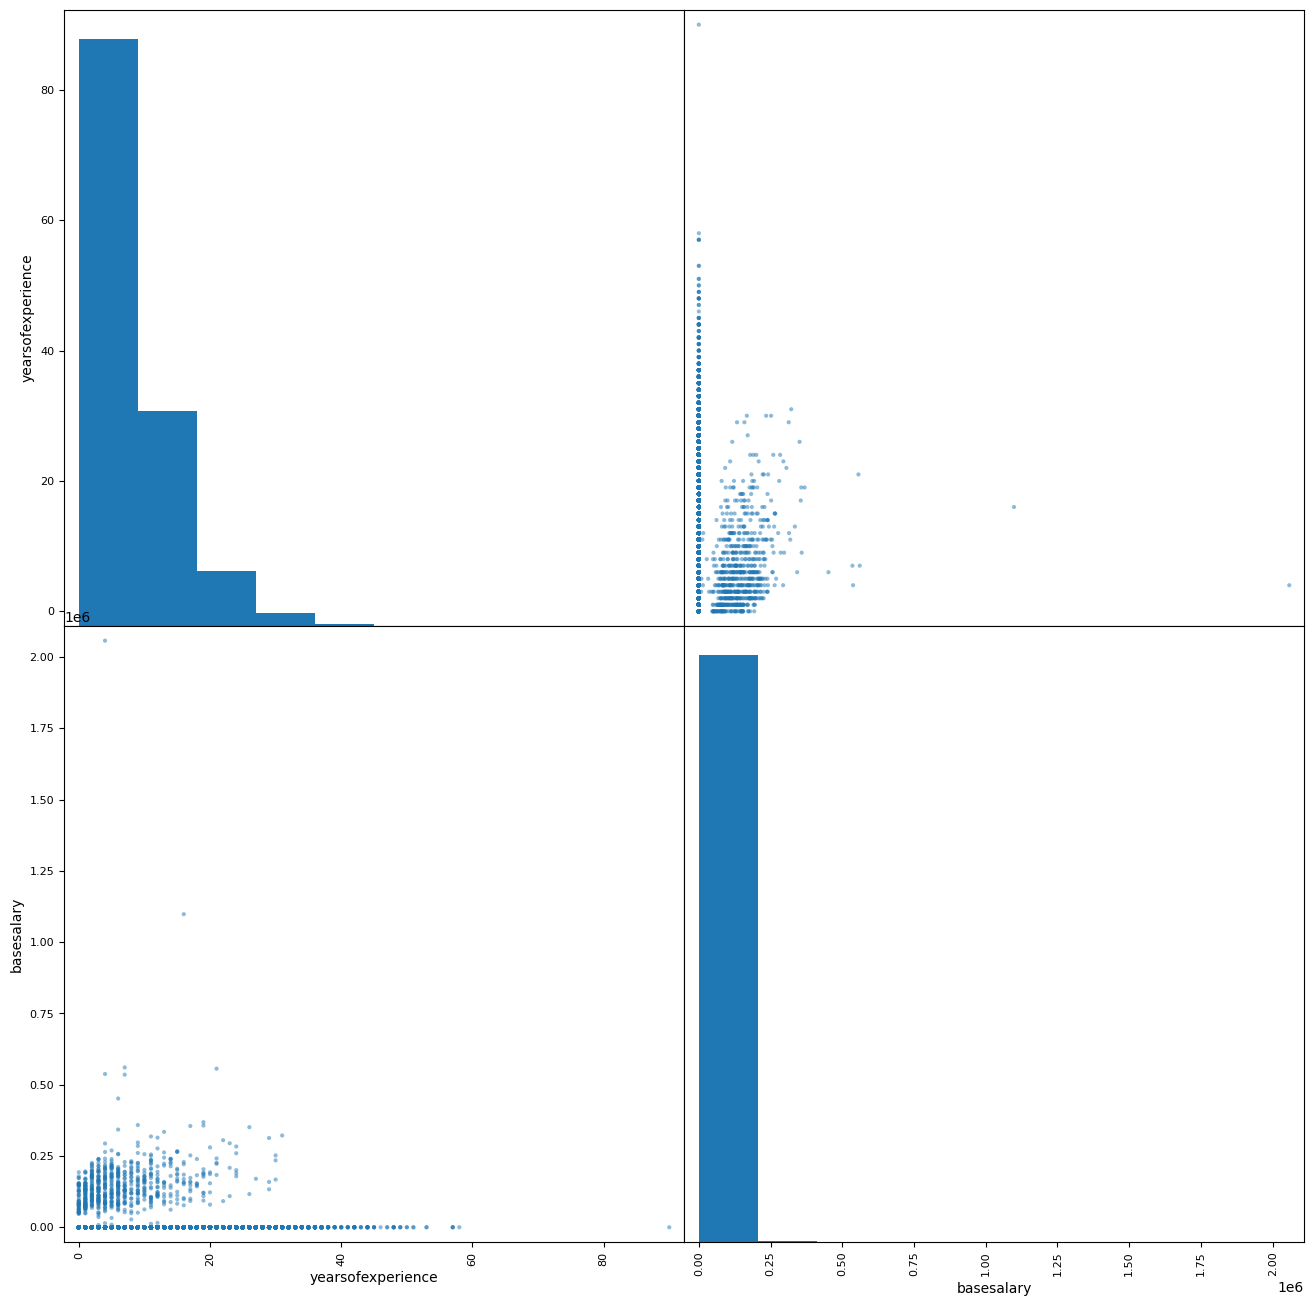

In [426]:
plot = scatter_matrix(copy_df, figsize=(16,16))

C:\Users\nwoko\AppData\Local\Temp\ipykernel_16720\1123110122.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap(copy_df.corr(), annot=True)


<AxesSubplot: >

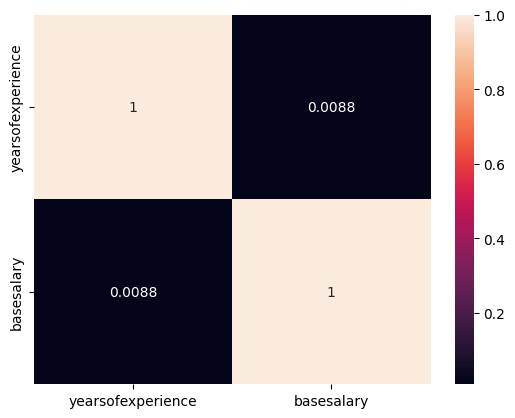

In [427]:
heatmap(copy_df.corr(), annot=True)

<h3>Findings</h3>
<p>
    Years of experience and base salary have very little corelation. This is because of the large disparity and in values. The highest base salary is over 2 million and the lowest is 30.<br>
    Some feature engineering will have to be done.
</p>

<h3>Feature Engineering</h3>

In [428]:
copy_df.loc[copy_df["basesalary"] <= 1000, 'basesalary'] *= 1000

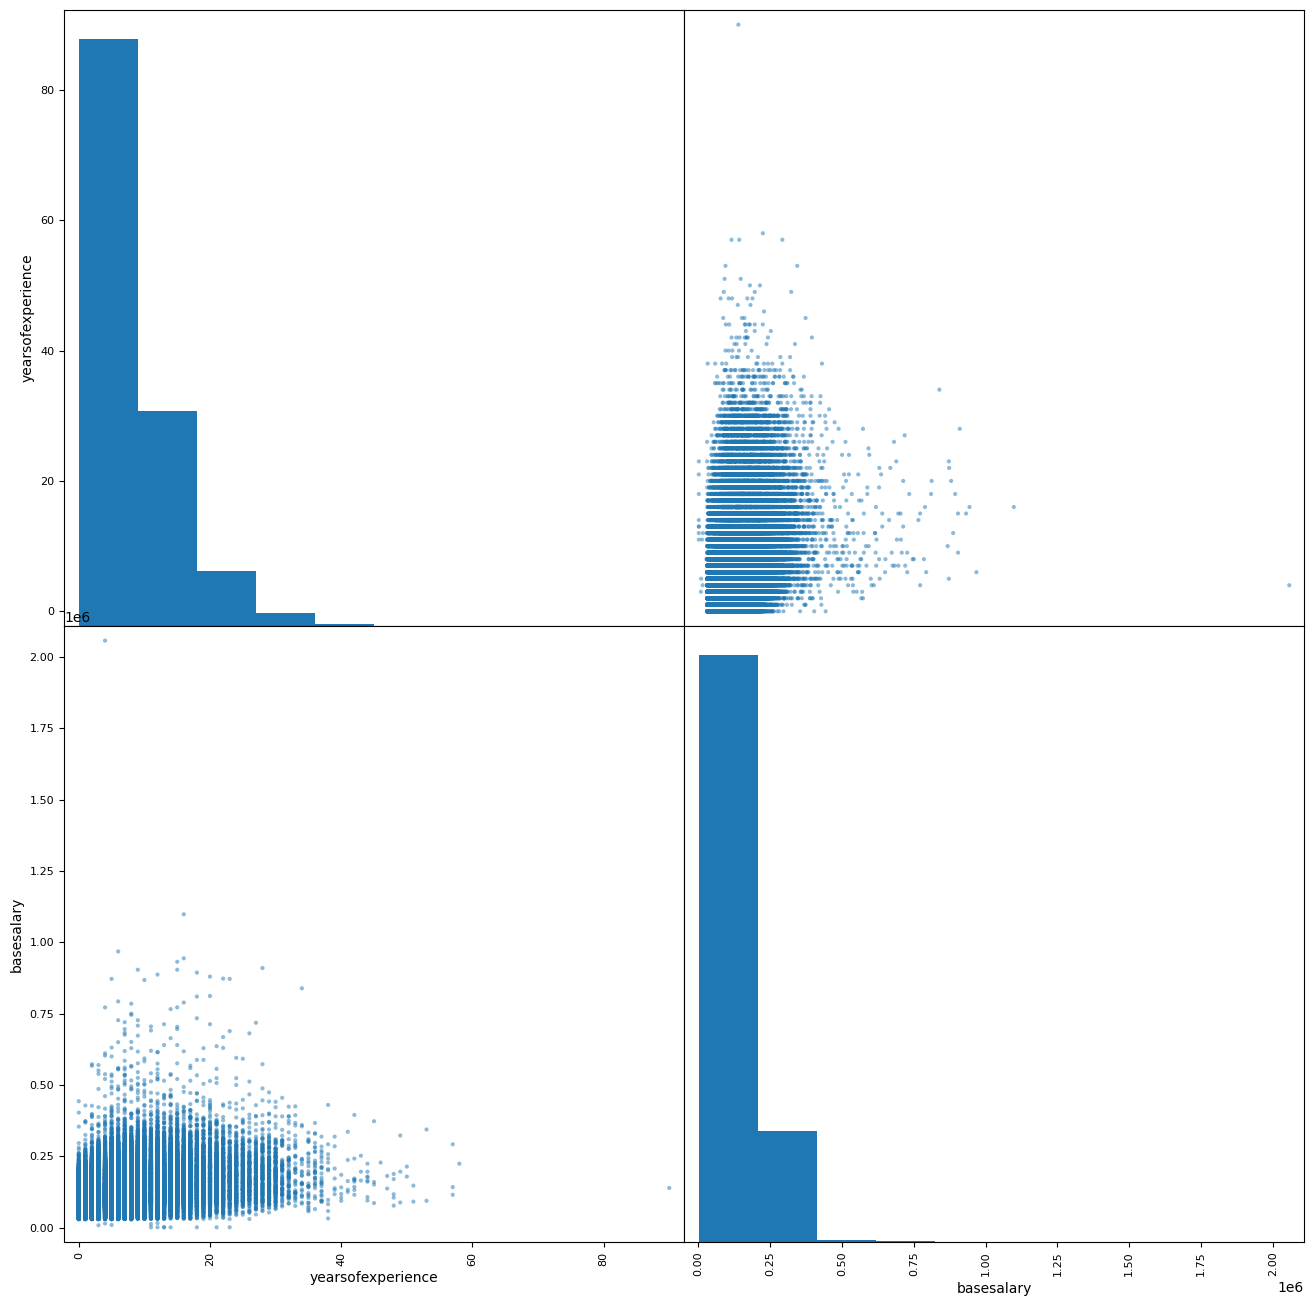

In [429]:
plot = scatter_matrix(copy_df, figsize=(16,16))

C:\Users\nwoko\AppData\Local\Temp\ipykernel_16720\1123110122.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap(copy_df.corr(), annot=True)


<AxesSubplot: >

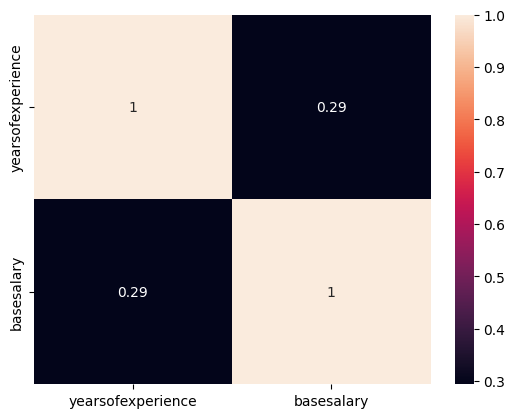

In [430]:
heatmap(copy_df.corr(), annot=True)

<h2>Data Testing</h2>